In [41]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import pandas as pd
import tensorflow as tf
from tensorflow import keras

print(tf.__version__)

2.4.1


In [42]:
fashion_mnist = keras.datasets.fashion_mnist
(x_train_all, y_train_all), (x_test, y_test) = fashion_mnist.load_data()
x_valid, x_train = x_train_all[:5000], x_train_all[5000:]
y_valid, y_train = y_train_all[:5000], y_train_all[5000:]

print(x_valid.shape, y_valid.shape)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(5000, 28, 28) (5000,)
(55000, 28, 28) (55000,)
(10000, 28, 28) (10000,)


In [43]:
from sklearn.preprocessing import StandardScaler

# normalize

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28)
x_valid_scaled = scaler.transform(x_valid.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28)
x_test_scaled = scaler.transform(x_test.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28)

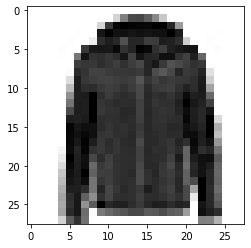

In [44]:
def show_single_image(img_arr):
    plt.imshow(img_arr, cmap="binary")
    plt.show()

show_single_image(x_train[0])

In [45]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

model.compile(loss=tf.losses.sparse_categorical_crossentropy,
              optimizer = tf.optimizers.Adam(0.001),
              metrics=[tf.metrics.sparse_categorical_accuracy])

In [46]:
model.layers

In [47]:
history = model.fit(x_train_scaled, y_train, epochs=10, validation_data=(x_valid_scaled, y_valid))

Epoch 1/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.5589 - sparse_categorical_accuracy: 0.7981 - val_loss: 0.3605 - val_sparse_categorical_accuracy: 0.8702
Epoch 2/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3548 - sparse_categorical_accuracy: 0.8678 - val_loss: 0.3602 - val_sparse_categorical_accuracy: 0.8674
Epoch 3/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3114 - sparse_categorical_accuracy: 0.8836 - val_loss: 0.3215 - val_sparse_categorical_accuracy: 0.8820
Epoch 4/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2900 - sparse_categorical_accuracy: 0.8908 - val_loss: 0.3070 - val_sparse_categorical_accuracy: 0.8856
Epoch 5/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2661 - sparse_categorical_accuracy: 0.8992 - val_loss: 0.3254 - val_sparse_categorical_accuracy: 0.8842
Epoch 6/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2507 - spars

In [48]:
history.history

{'loss': [0.45830148458480835,
  0.3503887355327606,
  0.31388309597969055,
  0.29113858938217163,
  0.26993122696876526,
  0.2551894783973694,
  0.2379964143037796,
  0.2311570644378662,
  0.21721358597278595,
  0.20886747539043427],
 'sparse_categorical_accuracy': [0.8323454260826111,
  0.8703272938728333,
  0.883618175983429,
  0.8910909295082092,
  0.8980908989906311,
  0.9037091135978699,
  0.9099090695381165,
  0.9132727384567261,
  0.9175636172294617,
  0.9214181900024414],
 'val_loss': [0.36054691672325134,
  0.36024579405784607,
  0.32145923376083374,
  0.30696654319763184,
  0.3254120349884033,
  0.3082122206687927,
  0.3432527184486389,
  0.3324355483055115,
  0.33486148715019226,
  0.3408338725566864],
 'val_sparse_categorical_accuracy': [0.870199978351593,
  0.8673999905586243,
  0.8820000290870667,
  0.8855999708175659,
  0.8841999769210815,
  0.8853999972343445,
  0.8939999938011169,
  0.890999972820282,
  0.8862000107765198,
  0.8885999917984009]}

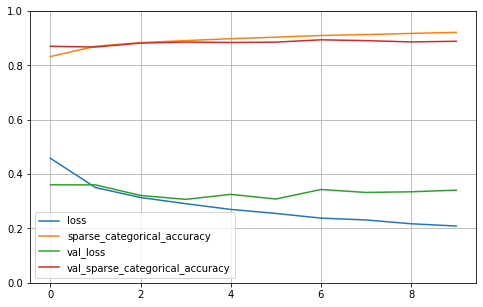

In [49]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.ylim(0, 1)

plot_learning_curves(history)

In [50]:
model.evaluate(x_test_scaled, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.3654 - sparse_categorical_accuracy: 0.8832


[0.36542001366615295, 0.8831999897956848]